In [1]:
# Nice to have and only here as a reference until moved to its instructional home :)
#export CUDNN_PATH=$(dirname $(python -c "import nvidia.cudnn; print(nvidia.cudnn.__file__)"))
#export SITE_PACKAGES_PATH=$(python -c "import site; print(site.getsitepackages()[0])")
#export LD_LIBRARY_PATH=$CUDNN_PATH/lib:$SITE_PACKAGES_PATH/tensorrt_libs/:$LD_LIBRARY_PATH

In [2]:
!conda list

# packages in environment at /home/flaniganp/mambaforge/envs/tensorflow-exercise-2:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       2_gnu    conda-forge
absl-py                   2.1.0                    pypi_0    pypi
anyio                     4.3.0                    pypi_0    pypi
argon2-cffi               23.1.0                   pypi_0    pypi
argon2-cffi-bindings      21.2.0                   pypi_0    pypi
arrow                     1.3.0                    pypi_0    pypi
asttokens                 2.4.1                    pypi_0    pypi
async-lru                 2.0.4                    pypi_0    pypi
attrs                     23.2.0                   pypi_0    pypi
babel                     2.14.0                   pypi_0    pypi
beautifulsoup4            4.12.3                   pypi_0    pypi
bleach                    6.1.0          

In [3]:
# Comment: This is a more extensive write-up of the much faster exercise_2_old in archive. It is mean to begin learning
# the ins and outs of training and evaluating a tensorflow model workflow.

# The os module in Python provides a way of using operating system dependent functionality. It allows you to interface
# with the underlying operating system that Python is running on – be it Windows, Mac or Linux. You can use the os module
# to handle file and directory paths, create folders, list contents of a directory, manage environment variables, execute
# shell commands, and more.
import os

# The 'matplotlib.pyplot' is a collection of functions in the 'matplotlib' library that make matplotlib work like MATLAB.
# Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure,
# plots some lines in a plotting area, decorates the plot with labels, etc. 'plt' is a commonly used shorthand alias
# for 'matplotlib.pyplot'. This allows you to access matplotlib's plotting functions with shorter syntax - for example,
# you can type 'plt.plot()' instead of 'matplotlib.pyplot.plot()'. This import is essential for data visualization,
# allowing you to create a wide variety of static, animated, and interactive plots and charts in Python.
import matplotlib.pyplot as plt

# NumPy (Numerical Python) is an essential library for scientific computing in Python. It provides support for large,
# multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
# With NumPy, you can perform complex mathematical operations on large amounts of data with ease and efficiency. It's
# widely used in data analysis, machine learning, and engineering for its speed and versatility. Importing it as 'np'
# is a common convention, making the code more readable and easier to write for the Python community.
import numpy as np

# A standard Python module for generating random numbers.
from random import randint

# TensorFlow is an open-source machine learning library developed by Google. It's used for both research and production
# at Google.
# * data: primarily used for data preprocessing and pipeline building. It offers tools for reading and writing data in
#   various formats, transforming it, and making it ready for machine learning models. Efficient data handling is
#   crucial in machine learning workflows, and TensorFlow's data module simplifies this process significantly.
from tensorflow import data
# * keras: originally an independent neural network library, now integrated into TensorFlow,
#   simplifies the creation and training of deep learning models. Keras is known for its user-friendliness and modular
#   approach, allowing for easy and fast prototyping. It provides high-level building blocks for developing deep
#   learning models while still enabling users to dive into lower-level operations if needed.
from tensorflow import keras
# * tensorflow.python.client: Provides functionalities to query the properties of the hardware devices TensorFlow can
#   access. Specifically, this module is often used to list and get detailed information about the system's available
#   CPUs, GPUs, and other hardware accelerators compatible with TensorFlow.
from tensorflow.python.client import device_lib
# * keras.models: This module in Keras is essential for creating neural network models. It includes classes like
#   Sequential and the Functional API for building models. The Sequential model is straightforward, allowing layers to
#   be added in sequence, suitable for simple architectures. The Functional API, on the other hand, provides greater
#   flexibility for creating complex models with advanced features like shared layers and multiple inputs/outputs.
#   Both types enable comprehensive model management, including training, evaluation, and saving/loading
#   functionalities, making them versatile for a wide range of deep learning applications.
from keras.models import load_model, Sequential
# * keras.callbacks: The keras.callbacks module offers a set of tools that can be applied during the training process of
#   a model. These callbacks are used for various purposes like monitoring the model's performance in real-time, saving
#   the model at certain intervals, early stopping when the performance plateaus, adjusting learning rates, and more.
#   They are crucial for enhancing and controlling the training process, allowing for automated and optimized model
#   training. Callbacks like ModelCheckpoint, EarlyStopping, TensorBoard, and ReduceLROnPlateau are commonly used for
#   efficient model training and fine-tuning.
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Versioning sourcing
from tensorflow import __version__ as tf_version

# TensorFlow Lite provides tools and classes for converting TensorFlow models into a highly optimized format suitable
# for deployment on mobile devices, embedded systems, or other platforms with limited computational capacity. This
# module includes functionalities for model conversion, optimization, and inference. By importing `lite`, you gain
# access to the TFLiteConverter class for model conversion, optimization options like quantization, and utilities for
# running TFLite models on target devices.
from tensorflow import lite

# This is a convenient module provided by Keras that contains various datasets used for machine learning tasks.
# These datasets are preprocessed and ready to use, making them ideal for educational purposes, benchmarking, and quick
# prototyping. In the context of your code, datasets is used to access the Fashion MNIST dataset, which is a collection
# of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset is a
# more complex, yet similar, alternative to the classic MNIST dataset of handwritten digits.
from keras import datasets, layers

# Mixed Precision: By combining float16 and float32 data types in your model, you can speed up training and reduce
# memory usage while maintaining the model's accuracy. This is especially beneficial when training large models or
# working with large datasets.
from keras.mixed_precision import set_global_policy

# Regular Expressions
# 1. search: This function is used to perform a search for a pattern in a string and returns a match object if the
# pattern is found, otherwise None. It's particularly useful for string pattern matching and extracting specific
# segments from text.
from re import search

# Key aspects of 'check_output':
# 1. **Process Execution**: The 'check_output' function is used to run a command in the subprocess/external process and
#    capture its output. This is especially useful for running system commands and capturing their output directly
#    within a Python script.
# 2. **Return Output**: It returns the output of the command, making it available to the Python environment. If the
#    called command results in an error (non-zero exit status), it raises a CalledProcessError.
# 3. **Use Cases**: Common use cases include executing a shell command, reading the output of a command, automating
#    scripts that interact with the command line, and integrating external tools into a Python workflow.
# Example Usage:
# Suppose you want to capture the output of the 'ls' command in a Unix/Linux system. You can use 'check_output' like
# this:
# output = check_output(['ls', '-l'])
from subprocess import check_output
# Key aspects of 'CalledProcessError':
#  1. Error Handling: CalledProcessError is an exception raised by check_output when the command it tries to execute
#   returns a non-zero exit status, indicating failure. This exception is particularly useful for error handling in
#   scripts where the success of an external command is crucial.
#  2. Exception Details: The exception object contains information about the error, including the return code, command
#  executed, and output (if any). This aids in debugging by providing clear insights into why the external command
#  failed.
#  3. Handling the Exception: In practical use, it is often caught in a try-except block, allowing the script to respond
#  appropriately to the failure of the external command, like logging the error or trying a fallback operation.
from subprocess import CalledProcessError

2024-02-28 21:13:50.645969: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-28 21:13:50.664572: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-28 21:13:50.664585: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-28 21:13:50.665049: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-28 21:13:50.668404: I tensorflow/core/platform/cpu_feature_guar

In [4]:
# This function `print_gpu_info` is designed to display detailed information about the available GPUs on the system.
# It utilizes TensorFlow's `device_lib.list_local_devices()` method to enumerate all computing devices recognized by
# TensorFlow. For each device identified as a GPU, the function extracts and prints relevant details including the GPU's
# ID, name, memory limit (converted to megabytes), and compute capability. The extraction of GPU information involves
# parsing the device's description string using regular expressions to find specific pieces of information. This
# function can be particularly useful for debugging or for setting up configurations in environments with multiple GPUs,
# ensuring that TensorFlow is utilizing the GPUs as expected.

def print_gpu_info():
    # Undocumented Method
    # https://stackoverflow.com/questions/38559755/how-to-get-current-available-gpus-in-tensorflow
    # Get the list of all devices
    devices = device_lib.list_local_devices()

    for device in devices:
        if device.device_type == 'GPU':
            # Extract the physical device description
            desc = device.physical_device_desc

            # Use regular expressions to extract the required information
            gpu_id_match = search(r'device: (\d+)', desc)
            name_match = search(r'name: (.*?),', desc)
            compute_capability_match = search(r'compute capability: (\d+\.\d+)', desc)

            if gpu_id_match and name_match and compute_capability_match:
                gpu_id = gpu_id_match.group(1)
                gpu_name = name_match.group(1)
                compute_capability = compute_capability_match.group(1)

                # Convert memory limit from bytes to gigabytes and round it
                memory_limit_gb = round(device.memory_limit / (1024 ** 2))

                print(
                    f"\tGPU ID {gpu_id} --> {gpu_name} --> "
                    f"Memory Limit {memory_limit_gb} MB --> "
                    f"Compute Capability {compute_capability}")

In [5]:
# NVIDIA Driver
try:
    # Execute the nvidia-smi command and decode the output
    nvidia_smi_output = check_output("nvidia-smi", shell=True).decode()

    # Split the output into lines
    lines = nvidia_smi_output.split('\n')

    # Find the line containing the driver version
    driver_line = next((line for line in lines if "Driver Version" in line), None)

    # Extract the driver version number
    if driver_line:
        driver_version = driver_line.split('Driver Version: ')[1].split()[0]
        print("NVIDIA Driver:", driver_version)

        # Extract the maximum supported CUDA version
        cuda_version = driver_line.split('CUDA Version: ')[1].strip().replace("|", "")
        print("Maximum Supported CUDA Version:", cuda_version)
    else:
        print("NVIDIA Driver Version or CUDA Version not found.")

except Exception as e:
    print("Error fetching NVIDIA Driver Version or CUDA Version:", e)

NVIDIA Driver: 545.23.08
Maximum Supported CUDA Version: 12.3     


In [6]:
print("Software Versions:")

# CUDA
try:
    # Execute the 'nvcc --version' command and decode the output
    nvcc_output = check_output("nvcc --version", shell=True).decode()

    # Use regular expression to find the version number
    match = search(r"V(\d+\.\d+\.\d+)", nvcc_output)
    if match:
        cuda_version = match.group(1)
        print("CUDA Version", cuda_version)
    else:
        print("CUDA Version not found")

except CalledProcessError as e:
    print("Error executing nvcc --version:", e)

Software Versions:
CUDA Version 11.8.89


In [7]:
# Sets the global dtype policy to the specified policy. In your code, set_global_policy('mixed_float16') is used to set
# the global policy to 'mixed_float16', which means that layers with compute dtype float16 and variable dtype float32
# will be created by default. This can lead to significant performance gains, particularly on modern GPUs.
set_global_policy('mixed_float16')

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3090, compute capability 8.6


2024-02-28 21:13:51.361886: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-28 21:13:51.393742: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-28 21:13:51.393829: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [8]:
# Define class names for Fashion MNIST
class_names = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Get the key length of the dictionary of Fashion MNIST
num_classes = len(class_names.keys())

In [9]:
model_file_path='../models/exercise_2.h5'
quantized_model_path='../models/exercise_2.tflite'

In [10]:
# Fashion MNIST dataset, which is a collection of 60,000 28x28 grayscale images of 10 fashion categories, along with
# a test set of 10,000 images.
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

In [11]:
def create_model(model_file_path, train_images, train_labels, test_images, test_labels, epochs):
    # What is One-Hot Encoding?
    # One-hot encoding is a method to convert categorical variables into a numerical form. This process is essential for
    # preparing categorical data for many kinds of machine learning algorithms, which require numerical input.

    # How Does One-Hot Encoding Work?
    # In one-hot encoding, each categorical value is converted into a binary vector. This vector has one 'hot' or
    # 'active' state (represented by 1) and the rest 'cold' states (represented by 0s). The length of this vector is
    # equal to the number of categories in the dataset.

    # Why Use One-Hot Encoding?
    # Many machine learning algorithms cannot work directly with categorical data. One-hot encoding converts the
    # categories into a form that these algorithms can understand and process.

    # Application in Your Code:
    # Here, one-hot encoding transforms these labels into a binary matrix representation. For instance, a label '2' will
    # be converted to [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] in a 10-dimensional space (since there are 10 categories).

    # Convert the labels to one-hot encoding
    train_labels_one_hot = keras.utils.to_categorical(train_labels, num_classes)
    test_labels_one_hot = keras.utils.to_categorical(test_labels, num_classes)

    # What is AUTOTUNE?
    # AUTOTUNE is a special value in TensorFlow's tf.data API. It's used to dynamically adjust the performance-related
    # configuration settings in the data loading pipeline. Essentially, it allows TensorFlow to automatically determine
    # the optimal number of elements to prefetch or other optimization parameters based on the available CPU and GPU
    # resources.
    # Why Use AUTOTUNE?

    # The main goal of AUTOTUNE is to optimize the data pipeline's performance. In machine learning, especially with
    # large datasets or complex models, data loading can become a bottleneck. AUTOTUNE helps to alleviate this by
    # optimizing the data processing steps, leading to faster and more efficient training.
    # How Does AUTOTUNE Work?

    # When AUTOTUNE is set, TensorFlow monitors the data pipeline during runtime and adjusts the buffer sizes and other
    # settings for operations like prefetching, caching, and shuffling. This dynamic adjustment is based on the current
    # system's resource availability and workload, aiming to optimize throughput and reduce latency.

    # Advantages:
    # Improved Performance: By allowing TensorFlow to optimize prefetch buffer sizes, the I/O time decreases, and the
    # data feeding pipeline becomes more efficient.
    # Resource Management: It helps in better utilization of CPU and GPU resources by dynamically adjusting to the
    # system's available resources.
    # Ease of Use: Instead of manually tuning the performance parameters, AUTOTUNE simplifies the process, making it
    # easier to work with complex data pipelines.

    # Apply AUTOTUNE to dataset operations
    batch_size = 32
    train_dataset = data.Dataset.from_tensor_slices((train_images, train_labels_one_hot))
    train_dataset = (train_dataset.
                     cache().  # This method caches the dataset in memory. Once the dataset is loaded into memory,
                     # subsequent iterations over the data will be much faster.
                     shuffle(len(train_images)).  # This method randomly shuffles the elements of the dataset.
                     # The len(train_images) argument specifies the buffer size for shuffling.
                     batch(batch_size).  # This method combines consecutive elements of the dataset into batches.
                     # Here, it's creating batches of 32 elements (images and labels).
                     prefetch(data.AUTOTUNE))  # This is where AUTOTUNE is applied. Prefetching allows later elements of
    # the dataset to be prepared while the current element is being processed. This can improve the efficiency of the
    # pipeline. By setting it to AUTOTUNE, you're allowing TensorFlow to automatically manage the buffer size for
    # prefetching based on runtime conditions.

    # Apply AUTOTUNE to test dataset operations
    test_dataset = data.Dataset.from_tensor_slices((test_images, test_labels_one_hot))
    test_dataset = test_dataset.batch(batch_size).cache().prefetch(data.AUTOTUNE)

    # Example: printing one-hot encoded labels for the first training sample
    print("Original label: ", train_labels[0])
    print("One-Hot Encoded Label: ", train_labels_one_hot[0])

    # Get a random index
    random_index = randint(0, len(train_images) - 1)

    # Get the random image and its label
    random_image = train_images[random_index]
    random_label = train_labels[random_index]

    # Print the label and its corresponding class name
    print("Label:", random_label)
    print("Class Name:", class_names[random_label])

    # Print the shape of the image
    print("Image Shape:", random_image.shape)

    # Normalize images (get values between 0 & 1)
    train_images, test_images = train_images / 255.0, test_images / 255.0

    # Check the shape of the input data
    print(f"Print the train image shape {train_images.shape}")
    print(f"print the train labels shape {train_labels.shape}")

    # Assuming the input shape is (height, width), for example, (28, 28) MNIST dataset
    # Tuple Unpacking: In Python, the asterisk (*) is used to unpack a tuple. This means that the elements of the tuple
    # are "taken out" and used individually.
    input_shape = (28, 28)
    # Tuple Extension: By placing the unpacked tuple and another element (in this case, 1) inside parentheses and
    # separating them by a comma, a new tuple is created that extends the original tuple.
    reshaped_input_shape = (*input_shape, 1)

    # Build the model
    # This is a Keras model that linearly stacks layers. It's ideal for a plain stack of layers where each layer has
    # exactly one input tensor and one output tensor.

    model_2 = Sequential([
        # Reshape Layer
        # Adjusts the input data shape to a format suitable for convolutional layers. It's crucial when your input data
        # does not already have the required dimensions (like adding a channel dimension to grayscale images).
        layers.Reshape(reshaped_input_shape, input_shape=input_shape),

        # First convolutional layer
        layers.Conv2D(
            32,  # Number of filters (or kernels). Each filter extracts different features from the input image.
            3,  # Kernel size (3x3). This size is a common choice for extracting features.
            padding='same',  # Padding means the output size is the same as the input size. This is achieved by adding
            # padding to the input.
            activation="relu"  # (Rectified Linear Unit) is a common activation function that introduces non-linearity
            # to the model, allowing it to learn more complex patterns.
        ),

        # Pool Size: (2, 2) reduces the spatial dimensions (height and width) of the output from the previous layer.
        # It helps in reducing the computational load and overfitting.
        layers.MaxPool2D(),

        # See first comment for first convolutional layer
        layers.Conv2D(32, 3, padding='same', activation="relu"),

        # Pool Size: (2, 2) reduces the spatial dimensions (height and width) of the output from the previous layer.
        # It helps in reducing the computational load and overfitting.
        layers.MaxPool2D(),

        # See first comment for first convolutional layer
        layers.Conv2D(16, 3, padding='same', activation="relu"),

        # Pool Size: (2, 2) reduces the spatial dimensions (height and width) of the output from the previous layer.
        # It helps in reducing the computational load and overfitting.
        layers.MaxPool2D(),

        # Converts the 2D output of the previous layers into a 1D array. This is necessary because the next dense layer
        # expects a 1D input.
        layers.Flatten(),

        layers.Dense(
            num_classes,  # Number of neurons. This should be equal to the number of classes in the classification task.
            activation="softmax",  # "softmax" is used for multi-class classification. It outputs a probability
            # distribution over the classes.
            dtype='float32'  # 'float32'. This is explicitly set due to mixed precision training (combining float16 and
            # float32 for performance).
        )
    ])

    # The compile method of a Keras model is where you configure the learning process before training the model. This
    # method is essential as it sets up the optimizer, loss function, and metrics to be used for training and evaluating
    # the model. Let's dissect each component of the compile method in your code:
    model_2.compile(
        # categorical_crossentropy: This is the loss function used for multi-class classification problems where labels
        # are provided in a one-hot encoded format. The categorical cross-entropy loss compares the distribution of the
        # predictions (the outputs of the softmax in your model) with the true distribution (the true labels of the data
        # ). In simpler terms, this function calculates the difference between the actual labels and the predicted
        # labels. The goal of training is to minimize this difference.
        loss=keras.losses.categorical_crossentropy,
        # Adam Optimizer: Adam is an optimization algorithm that can be used instead of the classical stochastic
        # gradient descent procedure to update network weights iteratively based on training data.

        # Learning Rate (0.001): This is one of the most important hyperparameters in training neural networks. The
        # learning rate defines the step size at each iteration while moving toward a minimum of the loss function. A
        # learning rate of 0.001 is a good starting point for many models.

        # Adam optimizer combines the advantages of two other extensions of stochastic gradient descent, namely Adaptive
        # Gradient Algorithm (AdaGrad) and Root Mean Square Propagation (RMSProp). It's known for its efficiency and
        # effectiveness in practice, especially in situations with large datasets or parameters.
        optimizer=keras.optimizers.Adam(learning_rate=0.001),

        # 1. Accuracy
        # * Usage: Widely used in classification problems.
        #
        # * Explanation: Accuracy is the most intuitive performance measure and it is simply a ratio of correctly
        # predicted observations to the total observations. It's a great measure when the target classes are well
        # balanced.
        #
        # * Formula: Accuracy = (TP + TN) / (TP + TN + FP + FN), where TP = True Positives, TN = True Negatives,
        # FP = False Positives, and FN = False Negatives.
        #
        # * Considerations: While accuracy is very intuitive, it can be misleading in cases where the class distribution
        # is imbalanced. For example, in a dataset with 95% of Class A and 5% of Class B, a model that always predicts
        # Class A will still have a high accuracy of 95%, despite not being useful.

        # 2. Mean Absolute Error (MAE)
        # * Usage: Commonly used in regression problems but can be adapted for classification.
        #
        # * Explanation: MAE measures the average magnitude of the errors in a set of predictions, without considering
        # their direction. It’s the average over the test sample of the absolute differences between prediction and
        # actual observation where all individual differences have equal weight.
        #
        # * Formula: MAE = (1/n) * Σ|actual - forecast|, where n is the number of observations.
        #
        # * Considerations: MAE is a linear score, which means all the individual differences are weighted equally in
        # the average. For example, in a temperature forecasting model, an MAE of 2 degrees means the average prediction
        # was within 2 degrees of the actual temperature. In classification, it can be used to indicate how far off the
        # predictions are on average, but it's less common and less intuitive than in regression.
        metrics=["accuracy", "mae"]

        # Other Metrics to consider:

        # 1. Precision
        # * Usage: Particularly useful in scenarios where False Positives are more concerning than False Negatives.
        #
        # * Explanation: Precision is the ratio of correctly predicted positive observations to the total predicted
        # positives. High precision relates to a low rate of false positives.
        #
        # * Formula: Precision = TP / (TP + FP), where TP is True Positives and FP is False Positives.
        #
        # * Consideration: Precision becomes especially important in scenarios where False Positives are costly.
        # For example, in email spam detection, a false positive (marking a legitimate email as spam) can be more
        # problematic than a false negative (failing to mark a spam email). However, focusing only on precision might
        # lead to a model that is overly cautious, potentially missing out on many true positive cases.

        # 2. Recall (Sensitivity)
        # * Usage: Important in cases where False Negatives are more critical than False Positives.
        #
        # * Explanation: Recall is the ratio of correctly predicted positive observations to all the observations in the
        # actual class. High recall relates to a low rate of false negatives.
        #
        # * Formula: Recall = TP / (TP + FN), where FN is False Negatives.
        #
        # * Consideration: Recall should be prioritized in situations where missing a True Positive is more critical
        # than incorrectly labeling a False Positive. For example, in medical testing for a serious disease, it's
        # crucial to identify all potential cases (high recall), even at the risk of some false alarms
        # (lower precision). However, a high recall with very low precision can lead to many false alarms, which might
        # be costly or inefficient.

        # 3. F1 Score
        # * Usage: Useful when you want to balance precision and recall.
        #
        # * Explanation: The F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both
        # false positives and false negatives into account.
        #
        # * Formula: F1 Score = 2*(Recall * Precision) / (Recall + Precision).
        #
        # * Consideration: F1 Score is useful when seeking a balance between Precision and Recall, especially in cases
        # where an uneven class distribution makes accuracy a less reliable metric. However, the F1 Score treats
        # precision and recall as equally important, which might not be suitable for all contexts. For instance, in
        # certain scenarios, recall might be significantly more important than precision and vice versa.

        # 4. Area Under the Curve (AUC) [BINARY CLASSICATION]
        # * Usage: Commonly used in binary classification problems.
        #
        # * Explanation: AUC represents the ability of the model to distinguish between classes. An AUC of 0.5 suggests
        # no discrimination ability, whereas an AUC of 1.0 represents perfect discrimination.
        #
        # * Consideration: AUC is a powerful metric for binary classification problems, as it provides an aggregate
        # measure of performance across all possible classification thresholds. However, AUC doesn't convey information
        # about the actual values of thresholds and how they affect the balance between false positives and false
        # negatives. It's also less informative in multi-class classification scenarios.

        # 5. Mean Squared Error (MSE)
        # * Usage: Common in regression problems.
        #
        # * Explanation: MSE measures the average of the squares of the errors—that is, the average squared difference
        # between the estimated values and the actual value.
        #
        # * Formula: MSE = (1/n) * Σ(actual - forecast)², where n is the number of observations.
        #
        # * Consideration: MSE is sensitive to outliers as it squares the errors before averaging them. This can lead to
        # situations where the model is heavily penalized for a small number of large errors, which might not be
        # desirable in all contexts. MSE is more suitable when large errors are particularly undesirable and need more
        # attention.

        # 6. Root Mean Squared Error (RMSE)
        # * Usage: Also common in regression problems.
        #
        # * Explanation: RMSE is the square root of the mean of the squared errors. It's a measure of how spread out
        # these residuals are, i.e., it tells you how concentrated the data is around the line of best fit.
        #
        # * Formula: RMSE = √[Σ(predicted - actual)² / n].
        #
        # * Consideration: Similar to MSE, RMSE also gives higher weight to larger errors (due to squaring). This can be
        # beneficial when large errors are more significant, but it can also skew the model's focus towards larger
        # errors. RMSE can be more interpretable than MSE as it is in the same units as the response variable.

        # 7. Logarithmic Loss (Log Loss)
        #
        # * Usage: Common in binary and multi-class classification problems.
        #
        # * Explanation: Log loss measures the performance of a classification model where the prediction is a
        # probability value between 0 and 1. Log loss increases as the predicted probability diverge from the actual
        # label.
        #
        # * Consideration: Log Loss is sensitive to the predicted probabilities and is a strict measure, heavily
        # penalizing confident but wrong predictions. While it's a good measure for evaluating probabilistic outputs,
        # its strictness can sometimes lead to misleading conclusions, especially if the model is calibrated to be
        # overly confident.
    )

    # The EarlyStopping callback in Keras is used to stop training the model when a monitored metric has stopped
    # improving. This is a form of regularization used to prevent overfitting and to ensure that the model doesn't waste
    # computational resources by continuing to train past the point of diminishing returns.

    # Benefits
    # * Prevents Overfitting: By stopping training once the model performance ceases to improve, EarlyStopping helps to
    # prevent the model from overfitting to the training data.
    # * Saves Time and Resources: It reduces unnecessary computation and resource usage by cutting short the training
    # process when further training is unlikely to improve the model's performance.
    # * Optimizes Model Performance: With the restore_best_weights option, the model is guaranteed to exit training with
    # the most effective weights it found, rather than potentially overfit weights from the final epochs of training.

    # Usage Scenario
    # The EarlyStopping callback is particularly useful in scenarios where you don't know beforehand how many epochs are
    # needed to train the model. Instead of arbitrarily choosing a large number of epochs and risking overfitting,
    # EarlyStopping allows the model to determine the optimal number of epochs based on the actual training dynamics.
    #
    # It's a smart way to ensure efficient and effective training, especially when working with large and complex
    # datasets.

    # Best Practices:
    # Determining the right value for the patience parameter in EarlyStopping can be somewhat nuanced, as it depends on
    # the specific characteristics of your training data and model. However, there are general guidelines and best
    # practices you can consider:

    # 1. Change in Performance Metric: A standard approach is to monitor a specific performance metric, like validation
    # accuracy or loss, and stop training if there's no significant change in this metric over a given number of epochs.
    # What constitutes a "significant change" can vary; sometimes a minimal improvement threshold (like 1% in accuracy)
    # is set to avoid stopping due to minor fluctuations.

    # 2. Generalization vs. Training Time: Research suggests that "slower" stopping criteria, which allow more epochs
    # before stopping, can lead to improved generalization (better performance on unseen data) compared to "faster"
    # criteria. However, this comes at the cost of longer training times and increased computational resources.

    # 3. Monitoring Loss vs. Other Metrics: While it's common to monitor loss, it may not always capture what's most
    # important about your model. You might want to choose a performance metric that best defines the model's utility
    # for its intended application. For example, in a classification task, you might prioritize accuracy or F1 score
    # over loss.

    # 4. Learning Curves Analysis: Before implementing early stopping, it's helpful to train your model for a
    # sufficiently long time without it and plot learning curves. This can give you insights into how noisy the training
    #  process is and help you better decide the patience value.

    # 5. Model Complexity and Dataset Size: The optimal patience value can also depend on the complexity of your model
    # and the size of your dataset. For simpler models or smaller datasets, a smaller patience might suffice, while more
    # complex models or larger datasets might benefit from a larger patience value to fully realize their learning
    # potential.

    # 6. Early Stopping in Conjunction with Other Techniques: Early stopping is often used in conjunction with other
    # regularization techniques like dropout or weight decay. The combined effect of these techniques should be
    # considered when deciding on the patience value.

    # 7. Experimentation and Cross-Validation: As with many hyperparameters in machine learning, finding the optimal
    # patience value can require experimentation. Cross-validation can be used to test different values and find the
    # one that offers the best balance between training time and model performance.

    # In summary, there isn't a one-size-fits-all number for patience in early stopping. It often requires
    # experimentation and consideration of your specific model and data characteristics. The goal is to find a balance
    # between sufficient training to capture underlying patterns in the data and avoiding overfitting by training too
    # long.

    # Create an EarlyStopping callback
    early_stopping = EarlyStopping(
        # This parameter specifies the metric to be monitored. In this case, it's accuracy, which is the accuracy on
        # the validation dataset. The callback will monitor the accuracy at the end of each epoch.
        monitor='accuracy',
        #  Patience is the number of epochs with no improvement after which training will be stopped. Setting patience=3
        #  means the training process will continue for 3 more epochs even after detecting a stop in improvement. This
        #  allowance is beneficial to rule out the possibilities of random fluctuations in training metrics.
        patience=3,
        # When set to True, the model weights will be restored to the weights of the epoch with the best value of the
        # monitored metric. This ensures that even if the model's performance degrades for a few epochs before training
        # is stopped, you will retain the best-performing version of the model.
        restore_best_weights=True
    )

    # The ModelCheckpoint callback is used to save the Keras model or model weights at some frequency during training.
    # It allows you to save only the best performing model according to the performance of a specified metric.

    # Benefits
    # * Prevents Loss of a Good Model: During training, if the model's performance degrades (which can happen,
    # especially in later epochs), this callback ensures you don't lose the best model that has been trained so far.
    # * Saves Time: Automatically saving the best model during training eliminates the need to retrain the model to
    # find the best version.
    # * Convenience: Automatically handles the saving of models based on performance, making the training process more
    # manageable and efficient.

    # This callback is extremely useful when training a model for a large number of epochs.It is common in deep learning
    # to have models that might overfit or not improve after a certain point during training.The ModelCheckpoint ensures
    # that you always retain the best version of the model according to the chosen metric.

    # Define the model checkpoint callback
    model_checkpoint_callback = ModelCheckpoint(
        # This parameter specifies the path where the model or weights should be saved. The file is saved in the HDF5
        # format, which is a popular format for storing large numerical objects like weights of a neural network.
        model_file_path,
        # When set to True, the callback will only save the model when the monitored metric has improved, meaning the
        # current model is better than any previous model.
        save_best_only=True,  # Save only the best model
        # This parameter specifies which metric to monitor. Here, it's set to monitor the mean absolute error (mae).
        # The callback will track the changes in this metric after each epoch.
        monitor='mae',  # Monitor the mean absolute error
        # It is particularly useful in regression problems or situations where you want to account for the average
        # magnitude of errors in predictions, without considering their direction.
        #
        # Other commonly monitored metrics include:
        # * "val_loss": Monitors the loss on the validation dataset. It's useful when your primary objective is to
        # minimize loss.
        # * "val_accuracy": Tracks accuracy on the validation set. Ideal for classification problems where accuracy is
        # the main concern.
        # * "loss": Observes the model's total loss during training. This is more focused on the model's performance on
        # the training dataset.
        # * "accuracy": Similar to val_accuracy, but for the training set.
        #
        # Metrics for Multi-output Models: If your model has multiple outputs, Keras will add prefixes to the metric
        # names based on the output names.
        mode='min'  # The lower the MAE, the better
        # Other types of mode
        # * "auto": Automatically infers from the name of the monitored quantity. For instance, it sets to "max" for
        # metrics like "accuracy", and to "min" for metrics like "loss".
        # * "max": The model is saved when the monitored quantity increases. This mode is suitable for metrics where a
        # higher value indicates better performance, such as "accuracy".
    )

    # Train the neural network model on the training dataset:
    model_2.fit(
        # This is the training data you're passing to the model.
        train_dataset,
        # The model will go through the entire training dataset 30 times. Each pass through the entire dataset is called
        # an epoch.
        epochs,
        # The test dataset is used as validation data. This means at the end of each epoch, the model's performance is
        # evaluated on this validation dataset.
        validation_data=test_dataset,
        # These are the callbacks being used during training. See above declarations for more information.
        callbacks=[early_stopping, model_checkpoint_callback]
    )

    # Evaluate the model on the test dataset
    test_loss, test_accuracy, mae = model_2.evaluate(test_dataset)

    # Characteristics print
    print(f"Test Loss: {test_loss}")
    print(f"Test Accuracy: {test_accuracy}")
    print(f"Mean Absolute Error: {mae}")

    return model_2

In [12]:
# Create the model
model = create_model(model_file_path, train_images, train_labels, test_images, test_labels, 15)

# Save the model
model.save(model_file_path)

Original label:  9
One-Hot Encoded Label:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Label: 1
Class Name: Trouser
Image Shape: (28, 28)
Print the train image shape (60000, 28, 28)
print the train labels shape (60000,)
Epoch 1/30


2024-02-28 21:13:51.632139: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-28 21:13:51.632220: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-28 21:13:51.632260: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

   1/1875 [..............................] - ETA: 27:35 - loss: 51.3433 - accuracy: 0.0938 - mae: 0.1812

2024-02-28 21:13:52.888697: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f5054005fc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-28 21:13:52.888713: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-02-28 21:13:52.892660: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1709172832.943450   44397 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 13s 6ms/step - loss: 0.8531 - accuracy: 0.7928 - mae: 0.0537 - val_loss: 0.4468 - val_accuracy: 0.8443 - val_mae: 0.0441
Epoch 2/30
  44/1875 [..............................] - ETA: 6s - loss: 0.4543 - accuracy: 0.8374 - mae: 0.0449

/home/flaniganp/mambaforge/envs/tensorflow-exercise-2/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1875/1875 [==============================] - 11s 6ms/step - loss: 0.3819 - accuracy: 0.8637 - mae: 0.0383 - val_loss: 0.4255 - val_accuracy: 0.8503 - val_mae: 0.0376
Epoch 3/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3340 - accuracy: 0.8787 - mae: 0.0339 - val_loss: 0.3775 - val_accuracy: 0.8639 - val_mae: 0.0361
Epoch 4/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3070 - accuracy: 0.8892 - mae: 0.0313 - val_loss: 0.3329 - val_accuracy: 0.8788 - val_mae: 0.0321
Epoch 5/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2903 - accuracy: 0.8948 - mae: 0.0295 - val_loss: 0.3300 - val_accuracy: 0.8831 - val_mae: 0.0317
Epoch 6/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2746 - accuracy: 0.8996 - mae: 0.0280 - val_loss: 0.3234 - val_accuracy: 0.8866 - val_mae: 0.0306
Epoch 7/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2631 - accuracy: 0.9037 - mae: 0.0269 - val_los

In [13]:
# Loading the best saved model
saved_model = load_model(model_file_path)

In [14]:
predictions = model.predict(test_images.reshape(-1, 28, 28, 1))  # Reshape for the CNN input
predicted_classes = np.argmax(predictions, axis=1)

313/313 [==============================] - 0s 418us/step


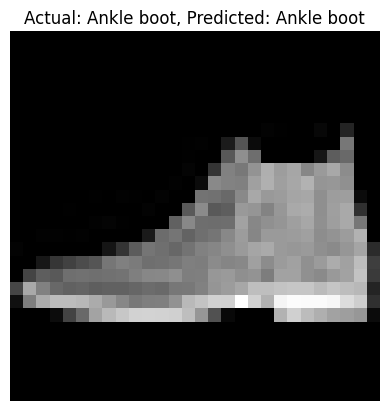

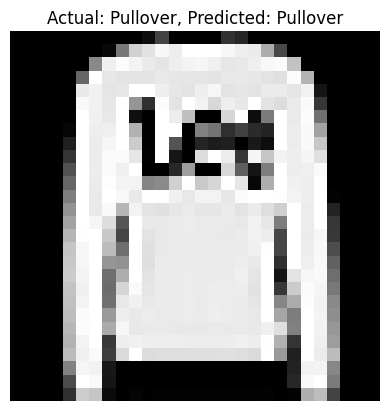

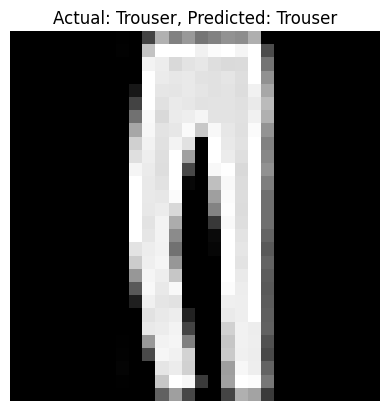

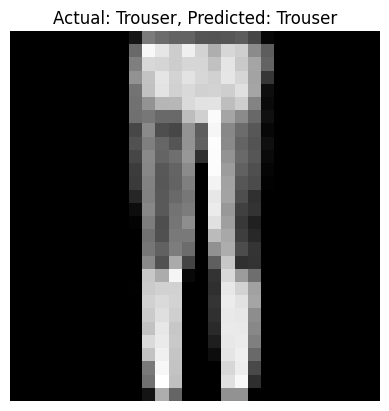

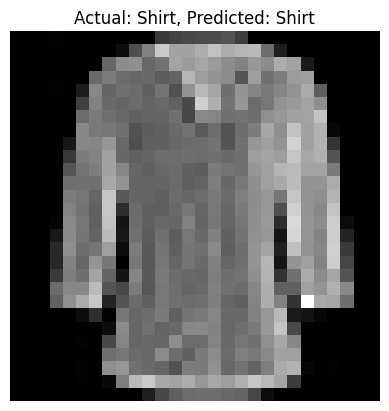

In [15]:
def display_test_image(i):
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Actual: {class_names[test_labels[i]]}, Predicted: {class_names[predicted_classes[i]]}")
    plt.axis('off')
    plt.show()

# Display a few test images with predictions
for i in range(5):  # Display first 5 images and predictions
    display_test_image(i)

In [16]:
# Get the size of the model
model_size = os.path.getsize(model_file_path)

# Convert size to more readable format (e.g., in MB)
model_size_mb = model_size / (1024 * 1024)

print(f"Model size: {model_size} bytes, or {model_size_mb:.2f} MB")

Model size: 233248 bytes, or 0.22 MB


In [ ]:
# Convert the model to the TensorFlow Lite format with quantization
converter = lite.TFLiteConverter.from_keras_model(model)
# converter.optimizations = [lite.Optimize.DEFAULT]

# Generate a quantized model
tflite_model = converter.convert()

# Save the quantized model to a file
with open(quantized_model_path, 'wb') as f:
    f.write(tflite_model)

# Get the size of the model
model_size = os.path.getsize(quantized_model_path)

# Convert size to more readable format (e.g., in MB)
model_size_mb = model_size / (1024 * 1024)

print(f"Quantized Model size: {model_size} bytes, or {model_size_mb:.2f} MB")

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 1, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f514f1a1390>, 139988210926896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 1, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f514f1a1390>, 139988210926896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f514f1a3640>, 139988210907504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f514f1a3640>, 139988210907504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 32, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f514f1a3f70>, 139988211106320), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 32, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f514f1a3f70>, 139988211106320), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f514f1e8a30>, 139988211106160), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f514f1e8a30>, 139988211106160), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 32, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f514f1ea320>, 139988211088832), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 32, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f514f1ea320>, 139988211088832), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f514f1e93c0>, 139988211088912), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f514f1e93c0>, 139988211088912), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 1, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5135b5d000>, 139988210926896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 1, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5135b5d000>, 139988210926896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5135b5e200>, 139988210907504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5135b5e200>, 139988210907504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 32, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5135b5f1c0>, 139988211106320), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 32, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5135b5f1c0>, 139988211106320), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5135b90220>, 139988211106160), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5135b90220>, 139988211106160), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 32, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5135b91210>, 139988211088832), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 32, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5135b91210>, 139988211088832), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5135b92230>, 139988211088912), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5135b92230>, 139988211088912), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 1, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f514f1a1390>, 139988210926896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 1, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f514f1a1390>, 139988210926896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f514f1a3640>, 139988210907504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f514f1a3640>, 139988210907504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 32, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f514f1a3f70>, 139988211106320), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 32, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f514f1a3f70>, 139988211106320), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f514f1e8a30>, 139988211106160), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f514f1e8a30>, 139988211106160), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 32, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f514f1ea320>, 139988211088832), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 32, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f514f1ea320>, 139988211088832), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f514f1e93c0>, 139988211088912), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f514f1e93c0>, 139988211088912), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 1, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5135b5d000>, 139988210926896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 1, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5135b5d000>, 139988210926896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5135b5e200>, 139988210907504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5135b5e200>, 139988210907504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 32, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5135b5f1c0>, 139988211106320), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 32, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5135b5f1c0>, 139988211106320), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5135b90220>, 139988211106160), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5135b90220>, 139988211106160), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 32, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5135b91210>, 139988211088832), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 32, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5135b91210>, 139988211088832), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5135b92230>, 139988211088912), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5135b92230>, 139988211088912), {}).


INFO:tensorflow:Assets written to: /tmp/tmpun89bxse/assets


INFO:tensorflow:Assets written to: /tmp/tmpun89bxse/assets


In [ ]:
predictions = tflite_model.predict(test_images.reshape(-1, 28, 28, 1))  # Reshape for the CNN input
predicted_classes = np.argmax(predictions, axis=1)

In [ ]:
def display_test_image(i):
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Actual: {class_names[test_labels[i]]}, Predicted: {class_names[predicted_classes[i]]}")
    plt.axis('off')
    plt.show()

# Display a few test images with predictions
for i in range(5):  # Display first 5 images and predictions
    display_test_image(i)